###IMPORTING THE LIBRARY

In [23]:
''' apyori is a simple Python library used to implement the Apriori algorithm used in association rule mining
it is used in netflix_movie_recommendation for analizing which movies are recommended after watching a particular movie by the user'''

' apyori is a simple Python library used to implement the Apriori algorithm used in association rule mining\nit is used in netflix_movie_recommendation for analizing which movies are recommended after watching a particular movie by the user'

In [5]:
!pip install apyori

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##IMPORTING DATASET

In [7]:
dataset=pd.read_csv('netflix.csv')
trans=[]

In [8]:
for i in range(0,7446):
  #trans.append([str(dataset.values[i,j]) for j in range(0,20) ])
  row = [str(dataset.iloc[i, j]) for j in range(0, 20)]
  trans.append(row)

In [8]:
print(trans)

[['The Shawshank Redemption', 'Fight Club', 'Pulp Fiction', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['The Godfather', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['The Godfather: Part II', 'Se7en', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['The Dark Knight', 'The Intouchables', "One Flew Over the Cuckoo's Nest", 'whole wheat Star Wars: Episode V - The Empire Strikes Back', 'Whiplash', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['12 Angry Men', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['Kanan Gill Comedy', 'The Lord of the Rings: The Return of the King', 'nan', 'nan', 'nan', 'nan', 

##HANDLING AND REMOVING NAN VALUES

In [9]:
## dataset handling or removing nan values

In [10]:
df=pd.DataFrame(dataset)
transaction=[]
for i in range(len(df)):
    row = []
    for item in df.iloc[i]:
        if not pd.isna(item):
            row.append(item)
    transaction.append(row)


In [11]:
print(transaction)

[['The Shawshank Redemption', 'Fight Club', 'Pulp Fiction'], ['The Godfather'], ['The Godfather: Part II', 'Se7en'], ['The Dark Knight', 'The Intouchables', "One Flew Over the Cuckoo's Nest", 'whole wheat Star Wars: Episode V - The Empire Strikes Back', 'Whiplash'], ['12 Angry Men'], ['Kanan Gill Comedy', 'The Lord of the Rings: The Return of the King'], ["Schindler's List", 'Game of thrones', 'American History X'], ['Billa', 'The Lord of the Rings: The Fellowship of the Ring', 'Whiplash'], ['The Lord of the Rings: The Return of the King'], ['Pulp Fiction', 'Memento'], ['The Good, the Bad and the Ugly'], ['The Godfather: Part II', 'The Shawshank Redemption', 'The Dark Knight', 'Pulp Fiction', 'The Departed'], ['The Lord of the Rings: The Fellowship of the Ring', 'Parasite', 'The Good, the Bad and the Ugly'], ['The Dark Knight', 'Once Upon a Time in the West'], ['The Dark Knight'], ['The Lord of the rings', 'The Silence of the Lambs', 'Prision Break', 'Black Panther', 'The Prestige', 'T

In [12]:
print(df.shape)

(7468, 22)


##TRAINING ON NETFLIX_MOVIE DATASET

In [13]:
from apyori import apriori
n_i=apriori(transactions=transaction,min_support=0.003,min_confidence=0.2, min_lift=3, min_length=2)

In [14]:
n_i

<generator object apriori at 0x7ab495197480>

##RESULTS

In [15]:
results = list(n_i)

In [16]:
results

[RelationRecord(items=frozenset({'Black Panther', 'Captain America'}), support=0.0033476164970540974, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Captain America'}), items_add=frozenset({'Black Panther'}), confidence=0.24509803921568626, lift=5.156034244683789)]),
 RelationRecord(items=frozenset({'Comedy nights with Kapil', 'Game of thrones'}), support=0.0032137118371719335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Game of thrones'}), items_add=frozenset({'Comedy nights with Kapil'}), confidence=0.20512820512820512, lift=3.107297030217923)]),
 RelationRecord(items=frozenset({'Kanan Gill Comedy', 'Comedy nights with Kapil'}), support=0.008034279592929834, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kanan Gill Comedy'}), items_add=frozenset({'Comedy nights with Kapil'}), confidence=0.27149321266968324, lift=4.112599010582545)]),
 RelationRecord(items=frozenset({'Prision Break', 'Game of thrones'}), support=0.0045527584359935725, ordered_

In [43]:
def inspect(results):
  m1=[tuple(result[2][0][0])[0] for result in results]
  m2=[tuple(result[2][0][1])[0] for result in results]
  support=[result[1] for result in results]
  return list(zip(m1,m2,support))
Data=pd.DataFrame(inspect(results), columns=['m1','m2','support'])

In [44]:
Data

,m1,m2,support
0,Captain America,Black Panther,0.003348
1,Game of thrones,Comedy nights with Kapil,0.003214
2,Kanan Gill Comedy,Comedy nights with Kapil,0.008034
3,Game of thrones,Prision Break,0.004553
4,Harry Potter 1,Harry Potter 2,0.005758
...,...,...,...
76,The Intouchables,The Dark Knight,0.003348
77,The Intouchables,The Dark Knight,0.004419
78,The Lion King,The Dark Knight,0.003080
79,The Silence of the Lambs,The Lord of the rings,0.003482


In [45]:
Data.nlargest(n=10,columns='support')

,m1,m2,support
7,Interstellar,inception,0.015935
21,Billa,inception,0.008704
2,Kanan Gill Comedy,Comedy nights with Kapil,0.008034
15,The Lord of the rings,Billa,0.007231
29,The Intouchables,Comedy nights with Kapil,0.007231
17,Billa,The Lion King,0.006695
37,The Dark Knight,inception,0.006695
39,Interstellar,inception,0.006427
20,Billa,The Lord of the rings,0.006026
4,Harry Potter 1,Harry Potter 2,0.005758


##VISUALIZING


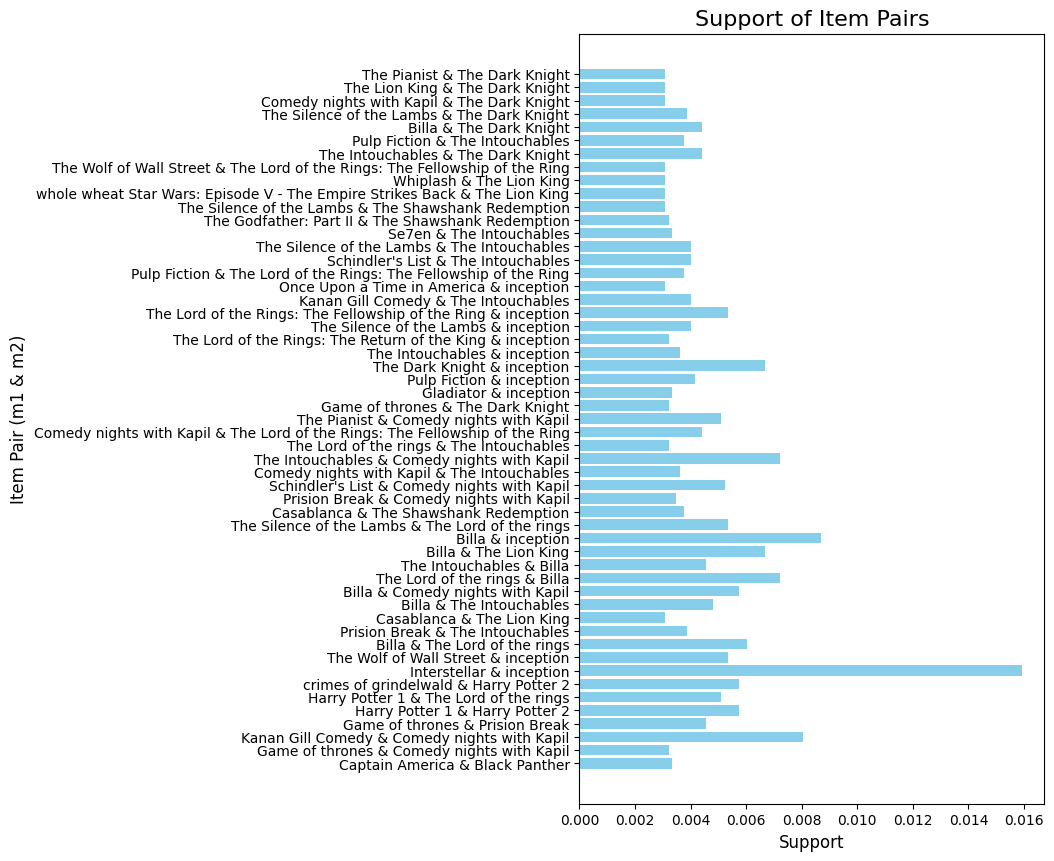

In [50]:
#make the plot larger
plt.figure(figsize=(6, 10))
Data['rule'] = Data['m1'] + ' & ' + Data['m2']
plt.barh(Data['rule'], Data['support'], color='skyblue')

# Add titles and labels
plt.title('Support of Item Pairs', fontsize=16)  # Title of the plot
plt.xlabel('Support', fontsize=12)  # Label for the x-axis (horizontal)
plt.ylabel('Item Pair (m1 & m2)', fontsize=12)  # Label for the y-axis (vertical)

plt.show()